In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Train_data.csv')

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df1 = df.select_dtypes(include=['object'])
df2 = df.select_dtypes(include=['float64', 'int64'])

## Label Encoding

In [12]:
# labelencoding
from sklearn.preprocessing import LabelEncoder
enc_dict={}
def encoding_label(x):
    le = LabelEncoder()
    r = le.fit_transform(x)
    enc_dict[x.name] = le.classes_
    return r

In [14]:
encodingColumns = df1.columns
le1 = df1[encodingColumns].apply(encoding_label)

In [15]:
enc_dict['protocol_type'][1], enc_dict['service'][0], enc_dict['class'][0], enc_dict['class'][1]

('tcp', 'IRC', 'anomaly', 'normal')

In [16]:
y_train0 = le1['class']
y_train0

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [17]:
le2 = le1.drop(['class'], axis=1)
le2

,protocol_type,service,flag
0,1,19,9
1,2,41,9
2,1,46,5
3,1,22,9
4,1,22,9
...,...,...,...
25187,1,16,2
25188,1,19,9
25189,1,46,1
25190,1,38,5


## onehotencoding

In [89]:
df3 = df1.drop(['class'],axis=1)
y_train_ohe = df['class']

In [90]:
ohe1 = pd.get_dummies(df3)

## StandardScaler

In [18]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaled1 = scaler.fit_transform(df2)

In [20]:
scaled_df1 = pd.DataFrame(scaled1, columns=df2.columns)

## data합치기

In [21]:
# label encoding한 le2데이터(문자열타입의 데이터를 label encoding한)와 
# standard scaling한 scaled_df1 데이터(숫자형데이터를 standard scaling한)를 합치기
X_train0 = pd.concat([le2,scaled_df1],axis=1)

In [100]:
# onehot encoding data
X_train_ohe = pd.concat([ohe1, scaled_df1], axis=1)

## 컬럼간의 correlation 확인

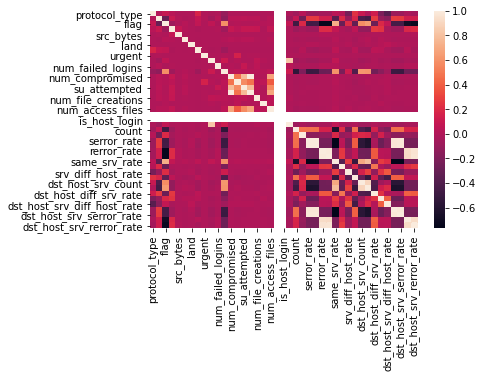

In [22]:
sns.heatmap(X_train0.corr())
plt.show()

In [28]:
X_train0.corr()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
protocol_type,1.000000,0.025322,0.094926,0.036421,-0.001286,-0.004734,-0.001123,0.176420,-0.000794,-0.011589,...,0.238318,0.104292,0.004797,0.131609,-0.206137,-0.360518,-0.080432,-0.079086,-0.018424,-0.047182
service,0.025322,1.000000,-0.295491,0.101301,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,...,0.184684,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865
flag,0.094926,-0.295491,1.000000,-0.066634,-0.006599,0.027606,-0.006593,0.068693,0.004744,0.067027,...,-0.319355,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075
duration,0.036421,0.101301,-0.066634,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,-0.001286,0.008554,-0.006599,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,-0.004734,-0.013782,0.027606,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001123,-0.006896,-0.006593,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,0.176420,0.088169,0.068693,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000794,0.011325,0.004744,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,-0.011589,-0.056165,0.067027,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719


## Feature importance

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [26]:
def getfeature_score(x):
    rf = RandomForestClassifier()#(max_depth=5, random_state=1)
    rf.fit(x, y_train0)
    
    fi_rf = rf.feature_importances_
    fi_rfs = pd.Series(fi_rf, index=x.columns)
  
    fi_rfs.sort_values(ascending=False).plot(kind='bar', figsize=(10,3))
    plt.show()

    pred_train_rf =rf.predict(x)
    accuracy = accuracy_score(y_train0, pred_train_rf)
    print(accuracy)
    print(confusion_matrix(y_train0, pred_train_rf))

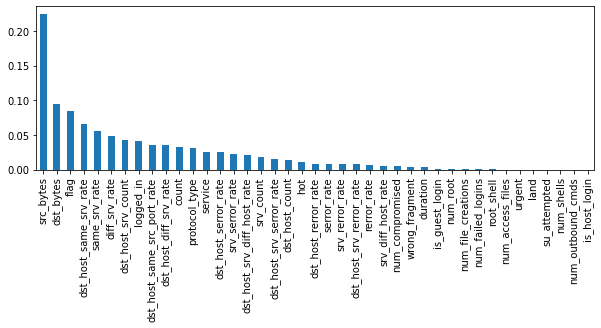

0.9999603048586853
[[11743     0]
 [    1 13448]]


In [27]:
getfeature_score(X_train0)

In [29]:
# 데이터간 상관관계를 통한 컬럼 정리.
X_train1 = X_train0.drop(['num_outbound_cmds','is_host_login'], axis=1)

In [32]:
# feature_inportance를 통한 컬럼 정리.
X_train_final = X_train1.drop(['land','num_shells','num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'], axis=1)

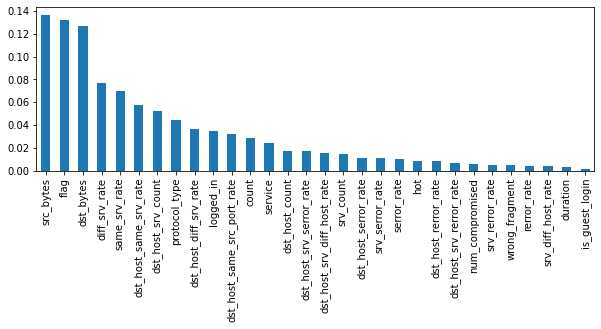

0.9999603048586853
[[11743     0]
 [    1 13448]]


In [33]:
getfeature_score(X_train_final)

## pca

In [34]:
# pca를 통한 컬럼 정리
from sklearn.decomposition import PCA
def get_pca(x, num):
    pca = PCA(n_components=num) # 주성분을 몇개로 할지 결정
    pcacompo = pca.fit_transform(x)
    pcadf = pd.DataFrame(pcacompo)#, colum)
    print(pca.explained_variance_ratio_)#,pca.explained_variance_)
    print('pca sum: ',pca.explained_variance_ratio_.sum())

In [35]:
get_pca(X_train0,20)

[0.85471249 0.03937475 0.01962647 0.01268114 0.0068477  0.00654411
 0.00649099 0.00438576 0.0040025  0.00372537 0.00361943 0.00356238
 0.00352063 0.00349491 0.00348926 0.00339176 0.00323787 0.00242684
 0.00219595 0.00185766]
pca sum:  0.9891879910971315


## dataset split

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
# train test set 분리 25% 비율
X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train0, 
                                                    test_size=0.25, 
                                                    stratify=y_train0, 
                                                    random_state=1)
# train, validation 분리 25% 비율
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25,
                                                  stratify=y_train,
                                                  random_state=1)


In [101]:
#ohe data set 분리
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_train_ohe, y_train0, 
                                                    test_size=0.25, 
                                                    stratify=y_train0, 
                                                    random_state=1)
# train, validation 분리 25% 비율
X_train_ohe, X_val_ohe, y_train_ohe, y_val_ohe = train_test_split(X_train_ohe, y_train_ohe,
                                                  test_size=0.25,
                                                  stratify=y_train_ohe,
                                                  random_state=1)


## Gridsearch

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

In [48]:
def gridSearch(model, param, num):
    start_time=time.time()
    grid_search = GridSearchCV(model,
                               param_grid=param,
                               #scoring='recall',
                               scoring=['accuracy','recall'], 
                               refit='recall',
                               cv=num,
                               #verbose=1,
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("최고점수 :", grid_search.best_score_)
    print('걸린시간 :', time.time() - start_time)
    return grid_search.best_estimator_, grid_search.best_params_

In [103]:
def gridSearch_ohe(model, param, num):
    start_time=time.time()
    grid_search = GridSearchCV(model,
                               param_grid=param,
                               #scoring='recall',
                               scoring=['accuracy','recall'], 
                               refit='recall',
                               cv=num,
                               #verbose=1,
                               n_jobs=-1)
    grid_search.fit(X_train_ohe, y_train_ohe)
    print("최고점수 :", grid_search.best_score_)
    print('걸린시간 :', time.time() - start_time)
    return grid_search.best_estimator_, grid_search.best_params_

## RandomizedSearch

In [41]:
def randGridSearch(model,param, num):
    start_time=time.time()
    randomized_search = RandomizedSearchCV(model,
                                           param_distributions=param,
                                           n_iter=200,
#                                           scoring='recall',
                                           scoring=['accuracy','recall'], 
                                           refit='recall',
                                           cv=num,
                                           n_jobs=-1)
    randomized_search.fit(X_train,y_train)
    print("최고점수: ",randomized_search.best_score_)
    print('걸린시간 :', time.time() - start_time)

    return randomized_search.best_estimator_, randomized_search.best_params_

![image](confusion.png)

## evaluating model

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score

In [44]:
def evaluating_model(name, model, Xdata, ydata):
    pred = model.predict(Xdata)
    cross_score = cross_val_score(model, Xdata, ydata, scoring='recall', cv=5)
    accuracy = accuracy_score(ydata, pred)
    c_matrix = confusion_matrix(ydata, pred)
    classification = classification_report(ydata, pred, target_names=[enc_dict['class'][0],enc_dict['class'][1]])
    print('=============', name, 'evaluating=============')
    print("Mean Cross_val_score(recall): \n", cross_score.mean())
    print("Accuracy_score: \n", accuracy)
    print("Confusion_matrix: \n", c_matrix)
    print("Classification_report: \n", classification)

# Models

In [56]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\users\mein0\anaconda3\envs\ml

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py37h03978a9_1         143 KB  conda-forge
    intel-openmp-2021.2.0      |     h57928b3_616         2.6 MB  conda-forge
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    libblas-3.9.0              |            8_mkl         3.9 MB  conda-forge
    libcblas-3.9.0             |            8_mkl         3.9 MB  conda-forge
    liblapack-3.9.0            |            8_mkl         3.9 MB  conda-forge
    lightgbm-3.2.0             |   py37hf2a7229_0         892 KB  conda-forge
    m2w64-gcc-libgfortran-5.3.0|                6         342 KB  conda



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## DecisionTree

In [49]:
# DecisionTree
tree = DecisionTreeClassifier()
param = {
    "criterion":['entropy'],# 분할의 품질을 측정, default:gini
    "splitter":['best'], # 각노드 분할시 선택되는전략, default: best
    "max_depth": [8], #default : none
    "random_state":[1]    
}
Decision_best_estimator, Decision_best_params = gridSearch(tree, param, 5)

최고점수 : 0.9959021810971578
걸린시간 : 2.254244089126587


In [50]:
tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [52]:
evaluating_model("DecisionTree",Decision_best_estimator, X_train, y_train)

============= DecisionTree evaluating=============
Mean Cross_val_score(recall): 
 0.9959021810971578
Accuracy_score: 
 0.997953422724065
Confusion_matrix: 
 [[6589   16]
 [  13 7552]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      6605
      normal       1.00      1.00      1.00      7565

    accuracy                           1.00     14170
   macro avg       1.00      1.00      1.00     14170
weighted avg       1.00      1.00      1.00     14170



In [53]:
evaluating_model("DecisionTree",Decision_best_estimator, X_val, y_val)

============= DecisionTree evaluating=============
Mean Cross_val_score(recall): 
 0.9916729530095868
Accuracy_score: 
 0.9925910245554614
Confusion_matrix: 
 [[2181   21]
 [  14 2508]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2202
      normal       0.99      0.99      0.99      2522

    accuracy                           0.99      4724
   macro avg       0.99      0.99      0.99      4724
weighted avg       0.99      0.99      0.99      4724



## gradientboosting

In [60]:
gbc = GradientBoostingClassifier()
param = {
    'loss':['exponential'],#손실함수 최적화. default: deviance 
    'n_estimators':[800], #tree개수 (default:100)
    'learning_rate':[0.1], #학습률. default:0.1
    'max_depth':[5],# default 3
    'subsample':[1], #학습시킬 sample의 비율  default:1.0
    'criterion':['mse'], #The function to measure the quality of a split. default:friedman_mse
    'random_state':[1]
}
gbc_best_estimator, gbc_best_params = gridSearch(gbc, param, 5)
#gbc_best_estimator, gbc_best_params = randGridSearch(gbc, param, 5)

최고점수 : 0.9992068737607402
걸린시간 : 42.98451900482178


In [61]:
evaluating_model('GradientBoosting',gbc_best_estimator,X_train, y_train)

============= GradientBoosting evaluating=============
Mean Cross_val_score(recall): 
 0.9992068737607402
Accuracy_score: 
 0.9999294283697954
Confusion_matrix: 
 [[6605    0]
 [   1 7564]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      6605
      normal       1.00      1.00      1.00      7565

    accuracy                           1.00     14170
   macro avg       1.00      1.00      1.00     14170
weighted avg       1.00      1.00      1.00     14170



In [62]:
evaluating_model('GradientBoosting',gbc_best_estimator,X_val, y_val)

============= GradientBoosting evaluating=============
Mean Cross_val_score(recall): 
 0.996034889203206
Accuracy_score: 
 0.9980948348856901
Confusion_matrix: 
 [[2194    8]
 [   1 2521]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2202
      normal       1.00      1.00      1.00      2522

    accuracy                           1.00      4724
   macro avg       1.00      1.00      1.00      4724
weighted avg       1.00      1.00      1.00      4724



## XGBoost

In [63]:
xgb = XGBClassifier(use_label_encoder=False)
param = {
    #'booster':['gbtree,dart'],# gbtree and dart use tree based models while gblinear uses linear functions.
    'n_estimators':[100],# #n_estimators is number of trees,
    'gamma': [1],# gamma [default=0],The larger gamma is, the more conservative the algorithm will be.
    'learning_rate':[0.3], # default=0.3, range: [0,1]
    'min_child_weight': [1],# [default=1], Minimum sum of instance weight (hessian) needed in a child. The larger min_child_weight is, the more conservative the algorithm will be.
    'subsample':[1],# [default=1],range: (0,1], Subsample ratio of the training instances.
    'colsample_bytree':[0.5],# [default=1], range: (0,1],  a family of parameters for subsampling of columns.
    'max_depth':[4],# [default=6], range: [0,∞] 
    'random_state':[1]
}
xgb_best_estimator, xgb_best_params = gridSearch(xgb, param, 5)
#xgb_best_estimator, xgb_best_params = randGridSearch(xgb, param, 5)

[10:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
최고점수 : 0.9993390614672837
걸린시간 : 1.5835661888122559


In [64]:
evaluating_model('XGBoost',xgb_best_estimator,X_train, y_train)

[10:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [65]:
evaluating_model('XGBoost',xgb_best_estimator,X_val, y_val)

[10:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## knn

In [67]:
knn = KNeighborsClassifier()
param = {
    'n_neighbors':[5], # default = 5
    'weights':['distance'], # uniform, distance or callable(user defined), default:uniform
    'algorithm':['ball_tree'], 
    #‘ball_tree’ will use BallTree, ‘kd_tree’ will use KDTree, ‘brute’ will use a brute-force search.
    # default : auto
    'p':[1], # 1 for manhattan_distance (l1), 2 for euclidean_distance (l2) default: 2
    'leaf_size':[20]
}

knn_best_estimator, knn_best_params = gridSearch(knn, param,5)

최고점수 : 0.995902181097158
걸린시간 : 2.6349692344665527


In [68]:
evaluating_model('KNeighbors',knn_best_estimator, X_train,y_train)

============= KNeighbors evaluating=============
Mean Cross_val_score(recall): 
 0.995902181097158
Accuracy_score: 
 0.9999294283697954
Confusion_matrix: 
 [[6605    0]
 [   1 7564]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      6605
      normal       1.00      1.00      1.00      7565

    accuracy                           1.00     14170
   macro avg       1.00      1.00      1.00     14170
weighted avg       1.00      1.00      1.00     14170



In [70]:
evaluating_model('KNeighbors',knn_best_estimator, X_val,y_val)

============= KNeighbors evaluating=============
Mean Cross_val_score(recall): 
 0.9920682068206821
Accuracy_score: 
 0.9942845046570703
Confusion_matrix: 
 [[2178   24]
 [   3 2519]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      2202
      normal       0.99      1.00      0.99      2522

    accuracy                           0.99      4724
   macro avg       0.99      0.99      0.99      4724
weighted avg       0.99      0.99      0.99      4724



## Light GBM

In [71]:
lgb = LGBMClassifier()
param = {
    'min_child_samples':[135],
    'max_depth':[-1],
    'num_leaves':[31]
}
lgb_best_estimator, lgb_best_params = gridSearch(lgb, param, 5)

최고점수 : 0.9981493721083939
걸린시간 : 1.4268569946289062


In [72]:
evaluating_model('LGBMClassifier',lgb_best_estimator, X_train, y_train)

============= LGBMClassifier evaluating=============
Mean Cross_val_score(recall): 
 0.9981493721083939
Accuracy_score: 
 0.9999294283697954
Confusion_matrix: 
 [[6605    0]
 [   1 7564]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      6605
      normal       1.00      1.00      1.00      7565

    accuracy                           1.00     14170
   macro avg       1.00      1.00      1.00     14170
weighted avg       1.00      1.00      1.00     14170



In [73]:
evaluating_model('LGBMClassifier',lgb_best_estimator, X_val, y_val)

============= LGBMClassifier evaluating=============
Mean Cross_val_score(recall): 
 0.99484441301273
Accuracy_score: 
 0.9974597798475868
Confusion_matrix: 
 [[2192   10]
 [   2 2520]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2202
      normal       1.00      1.00      1.00      2522

    accuracy                           1.00      4724
   macro avg       1.00      1.00      1.00      4724
weighted avg       1.00      1.00      1.00      4724



## Randomforest

In [86]:
rf = RandomForestClassifier()
rf_param = {
    'n_estimators' : [100],
    'max_depth' : [7],
    'min_samples_leaf' : [8],
    'min_samples_split' : [16]
}

rf_best_estimator, rf_best_params = gridSearch(rf, rf_param, 5)

최고점수 : 0.9969596827495042
걸린시간 : 3.3069820404052734


In [87]:
evaluating_model("RandomForestClassifier", rf_best_estimator, X_train, y_train)

============= RandomForestClassifier evaluating=============
Mean Cross_val_score(recall): 
 0.9973562458691342
Accuracy_score: 
 0.9920959774170783
Confusion_matrix: 
 [[6507   98]
 [  14 7551]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      6605
      normal       0.99      1.00      0.99      7565

    accuracy                           0.99     14170
   macro avg       0.99      0.99      0.99     14170
weighted avg       0.99      0.99      0.99     14170



In [88]:
evaluating_model("RandomForestClassifier", rf_best_estimator, X_val, y_val)

============= RandomForestClassifier evaluating=============
Mean Cross_val_score(recall): 
 0.9952412384095553
Accuracy_score: 
 0.9896274343776461
Confusion_matrix: 
 [[2159   43]
 [   6 2516]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      0.98      0.99      2202
      normal       0.98      1.00      0.99      2522

    accuracy                           0.99      4724
   macro avg       0.99      0.99      0.99      4724
weighted avg       0.99      0.99      0.99      4724



## 로지스틱 리그레션

In [104]:
lr = LogisticRegression()
lr_param = {
    'penalty' : ['l2'],# 규제 유형: 기본값 'l2'
     'C' : [1] # 규제 강도: C값이 작을수록 규제 강도가 크다
}

lr_best_estimator, lr_best_params = gridSearch_ohe(lr, lr_param, 5)

최고점수 : 0.9821546596166556
걸린시간 : 1.5232799053192139


c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
evaluating_model("LogisticRegression", lr_best_estimator, X_train_ohe, y_train_ohe)

c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

============= LogisticRegression evaluating=============
Mean Cross_val_score(recall): 
 0.9821546596166556
Accuracy_score: 
 0.9739590684544813
Confusion_matrix: 
 [[6362  243]
 [ 126 7439]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.98      0.96      0.97      6605
      normal       0.97      0.98      0.98      7565

    accuracy                           0.97     14170
   macro avg       0.97      0.97      0.97     14170
weighted avg       0.97      0.97      0.97     14170



c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
evaluating_model("LogisticRegression", lr_best_estimator, X_val, y_val)

c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

============= LogisticRegression evaluating=============
Mean Cross_val_score(recall): 
 0.961937765205092
Accuracy_score: 
 0.9546994072819645
Confusion_matrix: 
 [[2066  136]
 [  78 2444]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      2202
      normal       0.95      0.97      0.96      2522

    accuracy                           0.95      4724
   macro avg       0.96      0.95      0.95      4724
weighted avg       0.95      0.95      0.95      4724



c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
evaluating_model("LogisticRegression", lr_best_estimator, X_val_ohe, y_val_ohe)

c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

============= LogisticRegression evaluating=============
Mean Cross_val_score(recall): 
 0.9785902876001884
Accuracy_score: 
 0.9693056731583404
Confusion_matrix: 
 [[2097  105]
 [  40 2482]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.98      0.95      0.97      2202
      normal       0.96      0.98      0.97      2522

    accuracy                           0.97      4724
   macro avg       0.97      0.97      0.97      4724
weighted avg       0.97      0.97      0.97      4724



c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## SVM

In [84]:
svc = SVC()
svc_param = {
    'kernel':['linear'],
    'C' : [100], 
    'gamma' : [0.001],
    'random_state':[1]
}

svc_best_estimator, svc_best_params = gridSearch(svc, svc_param, 5)

최고점수 : 0.9747521480502315
걸린시간 : 176.17204451560974


In [107]:
svc = SVC()
svc_param = {
    'kernel':['linear'],
    'C' : [100], 
    'gamma' : [0.001],
    'random_state':[1]
}

svc_best_estimator, svc_best_params = gridSearch_ohe(svc, svc_param, 5)

최고점수 : 0.9840052875082618
걸린시간 : 39.78639626502991


In [85]:
evaluating_model("SVM", svc_best_estimator, X_train, y_train)

============= SVM evaluating=============
Mean Cross_val_score(recall): 
 0.9743555849306015
Accuracy_score: 
 0.958362738179252
Confusion_matrix: 
 [[6200  405]
 [ 185 7380]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.97      0.94      0.95      6605
      normal       0.95      0.98      0.96      7565

    accuracy                           0.96     14170
   macro avg       0.96      0.96      0.96     14170
weighted avg       0.96      0.96      0.96     14170



In [108]:
evaluating_model("SVM", svc_best_estimator, X_train_ohe, y_train_ohe)

============= SVM evaluating=============
Mean Cross_val_score(recall): 
 0.9840052875082618
Accuracy_score: 
 0.9769936485532816
Confusion_matrix: 
 [[6393  212]
 [ 114 7451]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.98      0.97      0.98      6605
      normal       0.97      0.98      0.98      7565

    accuracy                           0.98     14170
   macro avg       0.98      0.98      0.98     14170
weighted avg       0.98      0.98      0.98     14170



In [109]:
evaluating_model("SVM", svc_best_estimator, X_val_ohe, y_val_ohe)

============= SVM evaluating=============
Mean Cross_val_score(recall): 
 0.9805744145843155
Accuracy_score: 
 0.9720575783234547
Confusion_matrix: 
 [[2108   94]
 [  38 2484]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.98      0.96      0.97      2202
      normal       0.96      0.98      0.97      2522

    accuracy                           0.97      4724
   macro avg       0.97      0.97      0.97      4724
weighted avg       0.97      0.97      0.97      4724



## Testing set evaluation

In [110]:
models = []
models.append(('Decision Tree Classifier', Decision_best_estimator))
models.append(('GradientBoostingClassifier', gbc_best_estimator)) 
models.append(('XGBClassifier', xgb_best_estimator)) 
models.append(('KNeighborsClassifier', knn_best_estimator))
models.append(('LightGBMClassifier', lgb_best_estimator))
models.append(('RandomForestClassifier', rf_best_estimator))

In [111]:
models1 = []
models1.append(('LogisticRegression', lr_best_estimator))
models1.append(('SVM', svc_best_estimator))

In [112]:
# label encodig용 test evaluation
for i, v in models:
    pred = v.predict(X_test)
    cross_score = cross_val_score(v, X_test, y_test, scoring='recall', cv=5)
    accuracy = accuracy_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    classification = classification_report(y_test, pred, target_names=[enc_dict['class'][0],enc_dict['class'][1]])
    print('=================================', i, ' evaluating=================================')
    print("Mean Cross_val_score(recall): \n", cross_score.mean())
    print("Accuracy_score: \n", accuracy)
    print("Confusion_matrix: \n", c_matrix)
    print("Classification_report: \n", classification)

================================= Decision Tree Classifier  evaluating=================================
Mean Cross_val_score(recall): 
 0.9904819394325338
Accuracy_score: 
 0.9952365830422356
Confusion_matrix: 
 [[2917   19]
 [  11 3351]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      2936
      normal       0.99      1.00      1.00      3362

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298

================================= GradientBoostingClassifier  evaluating=================================
Mean Cross_val_score(recall): 
 0.9973227552536617
Accuracy_score: 
 0.9977770720863767
Confusion_matrix: 
 [[2927    9]
 [   5 3357]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2936
      normal       1.00      1.00 

In [113]:
# oneghot encodig용 test evaluation
for i, v in models1:
    pred = v.predict(X_test_ohe)
    cross_score = cross_val_score(v, X_test_ohe, y_test_ohe, scoring='recall', cv=5)
    accuracy = accuracy_score(y_test_ohe, pred)
    c_matrix = confusion_matrix(y_test_ohe, pred)
    classification = classification_report(y_test_ohe, pred, target_names=[enc_dict['class'][0],enc_dict['class'][1]])
    print('=================================', i, ' evaluating=================================')
    print("Mean Cross_val_score(recall): \n", cross_score.mean())
    print("Accuracy_score: \n", accuracy)
    print("Confusion_matrix: \n", c_matrix)
    print("Classification_report: \n", classification)

c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mein0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

================================= LogisticRegression  evaluating=================================
Mean Cross_val_score(recall): 
 0.9821530283733108
Accuracy_score: 
 0.9707843759923785
Confusion_matrix: 
 [[2800  136]
 [  48 3314]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.98      0.95      0.97      2936
      normal       0.96      0.99      0.97      3362

    accuracy                           0.97      6298
   macro avg       0.97      0.97      0.97      6298
weighted avg       0.97      0.97      0.97      6298

================================= SVM  evaluating=================================
Mean Cross_val_score(recall): 
 0.9803708519068846
Accuracy_score: 
 0.972054620514449
Confusion_matrix: 
 [[2806  130]
 [  46 3316]]
Classification_report: 
               precision    recall  f1-score   support

     anomaly       0.98      0.96      0.97      2936
      normal       0.96      0.99      0.97      3362

    accur

# 결론

## - 최종 모델의 선택 -
### - 부스팅 계열의 모델이 다소 시간이 걸리는 점을 고려해야 하나 전반적으로 성능이 뛰어 났음

### - ``False Negative``는 침입한걸 못 잡아낸 것이고 ``False Positive``는 침입한 것이 아닌데 침입이라고 오해한 것
### - 정보보안의 특성상 거짓침입을 Positive로 예측하는 경우에는 다시 한번 방어시스템을 점검하는 것으로 족함
### - 그러나 진짜침입을 Negative로 예측하는 경우 정보보안시스템 전체에 치명적일 수 있음
### - 그래서 ``False Positive``이 낮더라도 ``False Negative`` 비율이 높은 경우 좋은 예측모델이라고 평가할 수 없음
### - ``RandomForestClassifier``의 경우 ``False Positive``비율이 낮지만 ``False Negative``비율이 타 모델보다 높음

### - 따라서 최종적으로
### - ``False Positive``이 높지 않으면서 ``False Negative`` 비율이 낮은 ``부스팅계열 모델``을 최종모델로 선택